<a href="https://colab.research.google.com/github/yoooobin/ESAA/blob/main/ESAA_OB_week4_1_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **08** 텍스트 분석

> NLP이냐 텍스트 분석이냐?


1. **NLP(National Language Processing)**: 머신이 인간의 언어를 이해하고 해석하는데 더 중점을 두고 기술이 발전
2. **텍스트 분석(Text Analytics, TA)**: 비정형 텍스트에서 의미 있는 정보를 추출하는 것에 더 중점을 두고 기술이 발전

  => 머신러닝,  언어 이해, 통계 등 활용해 모델을 수립하고 정보를 추출해 비즈니스 인텔리전스나 예측 분석 등의 분석 작업 수행

- *텍스트 분류(Text Classfication/Categorization)*: 문서가 특정 분류 또는 카테고리에 속하는 것을 예측하는 기법
- *감성 분석(Sentiment Analysis)*: 텍스트에서 나타나는 감정/판단/믿음/의견/기분 등의 주관적인 요소를 분석하는 기법
- *텍스트 요약(Summarization)*: 텍스트 내에서 중요한 주제나 중심 사상을 추출하는 기법
- *텍스트 군집화(Clustering)와 유사도 측정*: 비슷한 유형의 문서에 대해 군집화를 수행하는 기법



---



#### 01 텍스트 분석 이해
- 텍스트 분석: 비정형 데이터인 텍스트를 분석하는 것
- 피처 벡터화(Feature Vectorization)/피처 추출(Feature Extraction): 텍스트를 word 기반의 다수의 피처로 추출하고 이 피처에 단어 빈도수와 같은 숫자 값을 부여하고, 텍스트를 단어의 조합인 벡터값으로 표현(변환)하는 것
- 텍스트의 피처 벡터화 변환법: *BOW(Bag of *Words*)*



> 텍스트 분석 수행 프로세스

1. 텍스트 사전 준비작업(텍스트 전처리): 텍스트를 피처로 만들기 전 미리 클렌징, 대/소문자 변경, 특수문자 삭제 등 클렌징 작업, 토큰화 작업, Stop word 제거 작업, 어근 추출 등의 텍스트 정규화 작업
2. 피처 벡터화/추출: 가공된 텍스트에서 피처를 추출하고 벡터 값을 할당(BOW, Word2Vec)
3. ML 모델 수립 및 학습/예측/평가: 피처 벡터화된 데이터 세트에 ML 모델을 적용해 학습/예측 및 평가를 수행

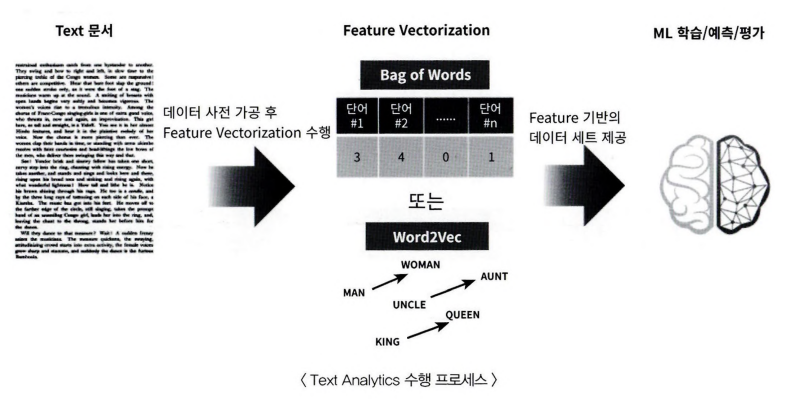



> 파이썬 기반의 NLP, 텍스트 분석 패키지

- NLTK(Natural Language Toolkit for Python): 방대한 데이터 세트와 서브 모듈, NLP의 거의 모든 영역 커버
- Gensim: 토픽 모델링
- SpaCy: 뛰어난 수행 성능으로 최근 가장 주목





---



#### 02 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화



> *클렌징*
- 텍스트에서 분석에 오히려 방해되는 불필요한 문자, 기호 등을 사전에 제거하는 작업



> *텍스트 토큰화*
- 문장 토큰화: 문서에서 문장을 분리
- 단어 토큰화: 문장에서 단어를 토큰으로 분리






**문장 토큰화**(sentence tokenization)

- 문장의 마침표(.), 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리
- 정규 표현식 이용해 토큰화 수행 가능

In [1]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
              You can see it out your window or on your television. \
              You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences),len(sentences))
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


**단어 토큰화**(word tokenization)

- 공백, 콤마(,), 마침표(.), 개행문자 등으로 단어를 분리
- 정규 표현식 이용해 다양한 유형으로 토큰화 수행 가능

In [2]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [3]:
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):

    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


- 문장을 단어별로 하나씩 토큰화 할 경우 문맥적인 의미는 무시
- **n-gram**: 연속된 n개의 단어를 하나의 토큰화 단어로 분리
  
  => n개 단어 크기 윈도우를 만들어 문장의 처음부터 오른쪽으로 움직이면서 토큰화 수행



> 스톱 워드 제거
- 스톱 워드(Stop word): 분석에 큰 의미가 없는 단어
- ex. 영어에서 'is, the, a, will' => 문장을 구성하는 필수 문법 요소지만 문맥적으로 큰 의미 X
- 사전에 제거하지 않으면 빈번함으로 인해 오히려 중요한 단어로 인지될 수 있음



In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


- 영어 스톱 워드 개수: 198개
- 3개의 문장별로 단어를 토큰화해 생성된 word_tokens 리스트에 대해 stopwords를 필터링으로 제거해 분석을 위한 의미 있는 단어만 추출

In [6]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []

# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
    filtered_words = []
    # 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
    for word in sentence :
        # 소문자로 모두 변환
        word = word.lower()
        # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords :
            filtered_words.append(word)
    all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


=> is, this와 같은 스톱 워드가 필터링을 통해 제거됨



> Stemming과 Lemmatization
- Stemming과 Lemmatization: 문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 것
- *Stemming*:원형 단어로 변환 시 일반적인 방법을 적용하거나 더 단순화된 방법을 적용해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출
- *Lemmatization*: 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어를 찾는 것



In [7]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [8]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest', 'a'))
print(lemma.lemmatize('fancier', 'a'), lemma.lemmatize('fanciest', 'a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy




---



#### 03 Bag of Words - BOW

- Bag of Words 모델: 문서가 가지는 모든 단어(Words)를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델

**문장 1:**

'My wife likes to watch baseball games and my daughter likes to watch baseball games too'

**문장 2:**

'My wife likes to play baseball'

1. 문장 1과 문장 2에 있는 모든 단어에서 중복을 제거하고 각 단어(feature 또는 term)를 칼럼 형태로 나열한다. 그후 각 단어에 고유의 인덱스를 다음과 같이 부여한다.

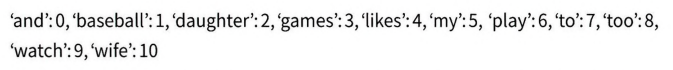

2. 개별 문장에서 해당 단어가 나타나는 횟수(Occurence)를 각 단어(단어 인덱스)에 기재한다.

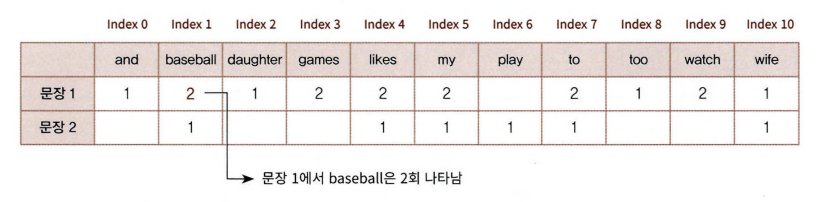

**<BOW 모델 장점>**

- 쉽고 빠른 모델 구축
- 문서의 특징을 잘 나타내어 여러 분야에서 활용도가 높음

**<BOW 모델 단점>**
- 문맥 의미(Semantic Context) 반영 부족: 단어의 순서를 고려하지 않기 때문에 문장 내에서 단어의 문맥적인 의미가 무시
- 희소 행렬 문제: BOW로 피처 벡터화를 수행하면 희소 행렬 형태의 데이터 세트가 만들어지기 쉬움



> BOW 피처 벡터화
- 피처 벡터화: 텍스트를 특정 의미를 갖는 숫자형 값인 벡터 값으로 변환하는 것
- 기존 텍스트 데이터를 또 다른 형태의 피처의 조합으로 변경하기 때문에 넓은 의미의 피처 추출에 포함
- 모든 문서에서 모든 단어를 칼럼 형태로 나열하고 각 문서에서 해당 단어의 횟수나 정규화된 빈도를 값으로 부여하는 데이터 세트 모델로 변경하는 것

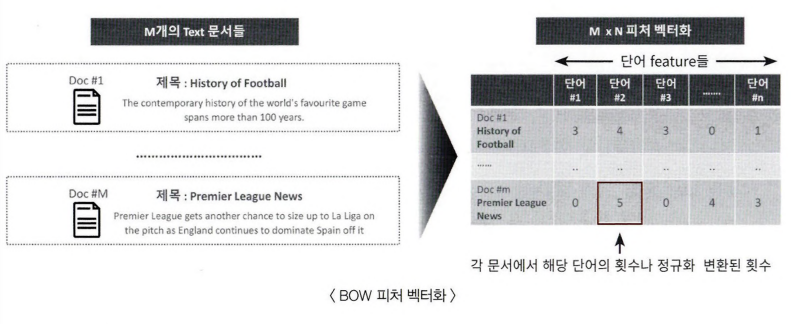


- *카운트 기반의 벡터화*: 단어 피처에 값을 부여할 때 각 문서에서 해당 단어가 나타나는 횟수(count)를 부여하는 경우

=> 카운트 값이 높을수록 중요한 단어로 인식

- *TF-IDF(Term Frequency Inverse Document Frequency) 기반의 벡터화*: 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 패널티를 부여

=> 문서마다 텍스트가 길고 문서의 개수가 많은 경우 적합

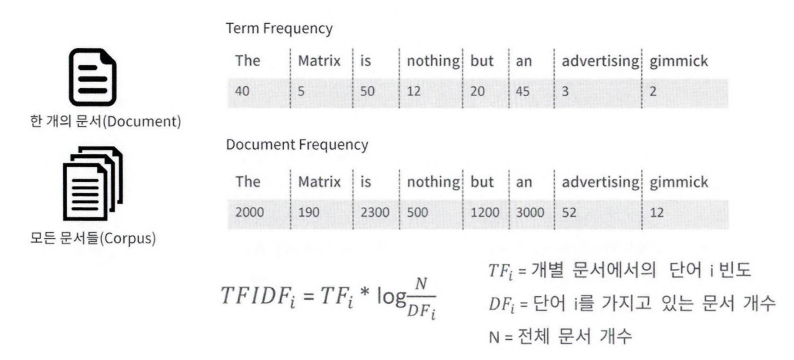



> 사이킷런의 Count 및 TF-IDF 벡터화 구현: CountVectorizer, TfidfVectirizer
- CountVectorizer: 카운트 기반의 벡터화를 구현한 클래스 (소문자 일괄 변환, 토큰화, 스톱 워드 필터링 등의 텍스트 전처리)

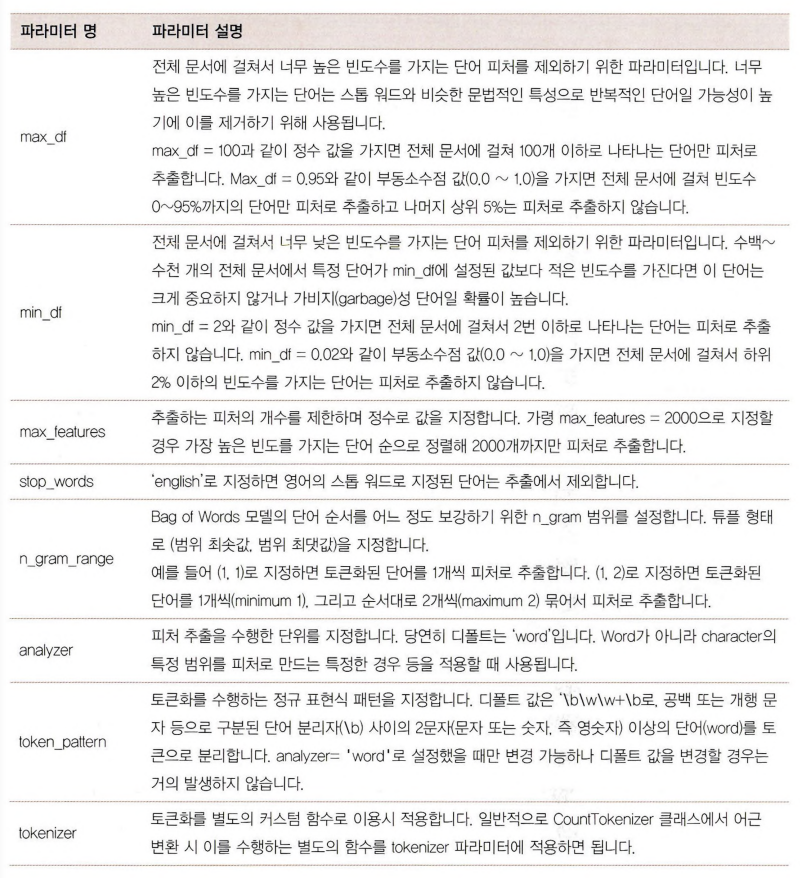



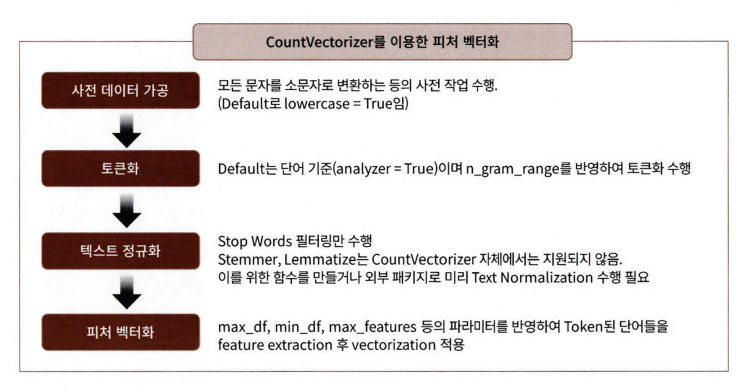



> BOW 벡터화를 위한 희소 행렬
- *희소 행렬*: 대규모 행렬의 대부분의 값을 0이 차지하는 행렬
- 희소 행렬을 물리적으로 적은 메모리 공간을 차지할 수 있도록 변환하는 방법 COO 형식, CSR 형식

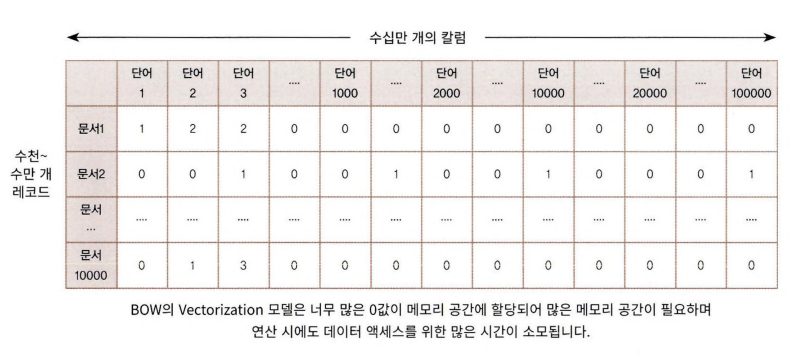



> 희소 행렬 - COO 형식
- **COO(Coordinate:좌표) 형식**: 0이 아닌 데이터만 별도의 데이터 배열(Array)에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식



In [9]:
import numpy as np

dense = np.array([[3,0,1], [0,2,0]])

In [10]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [11]:
# 다시 밀집 형태의 행렬로 출력
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

> 희소 행렬 - CSR 형식
- **CSR(Compressed Sparse Row) 형식**: COO 형식이 행과 열의 위치를 나타내기 위해 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식
- csr_matrix 클래스로 CSR 방식의 변환

In [12]:
from scipy import sparse

dense2 = np.array([[0, 0, 1, 0, 0, 5],
                   [1, 4, 0, 3, 2, 5],
                   [0, 6, 0, 3, 0, 0],
                   [2, 0, 0, 0, 0, 0],
                   [0, 0, 0, 7, 0, 8],
                   [1, 0, 0, 0, 0, 0]])

#0이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1 ])

#행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

#COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

#행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

#CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [13]:
dense3 = np.array([[0, 0, 1, 0, 0, 5],
                   [1, 4, 0, 3, 2, 5],
                   [0, 6, 0, 3, 0, 0],
                   [2, 0, 0, 0, 0, 0],
                   [0, 0, 0, 7, 0, 8],
                   [1, 0, 0, 0, 0, 0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)